# TEST DE HIPOTESIS LIGAS DE FUTBOL EUROPEAS

Creator: [Victor MV](https://www.kaggle.com/vctormerchan)

In [2]:
import pandas as pd
import numpy as np


data_futbol = pd.read_csv('data/futbol.csv')
data_futbol.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Napoli,it ITA,1,26,22,2,2,60,16,...,68,2.62,46.9,20.0,26.9,1.08,W W W L W,29610,Victor Osimhen - 19,Alex Meret
1,2,Barcelona,es ESP,1,25,21,2,2,47,8,...,65,2.60,48.2,19.6,28.7,1.19,W W L W W,82492,Robert Lewandowski - 15,Marc-André ter Stegen
2,3,Paris S-G,fr FRA,1,27,21,3,3,68,26,...,66,2.44,56.2,30.9,25.3,0.97,L W W W W,42615,Kylian Mbappé - 19,Gianluigi Donnarumma
3,4,Arsenal,eng ENG,1,27,21,3,3,62,25,...,66,2.44,50.3,25.4,24.9,0.96,W W W W W,60196,Martinelli - 12,Aaron Ramsdale
4,5,Manchester City,eng ENG,2,27,19,4,4,67,25,...,61,2.26,54.1,21.3,32.7,1.26,W D W W W,53219,Erling Haaland - 28,Ederson


In [4]:
print('Numero de registros: ',data_futbol.shape[0])

Numero de registros:  98


## La liga italiana ha tenido fama de defensiva, creo que se meten menos de dos goles de media por partido.

In [8]:
# Media de goles por partido en la liga italiana

data_futbol['Promedio'] = data_futbol['GF']/data_futbol['MP']

# data_futbol.query('Country == "it ITA"')['Promedio'].mean()
data_futbol.groupby('Country')['Promedio'].mean()

Country
de GER     1.585648
eng ENG    1.348747
es ESP     1.212333
fr FRA     1.416667
it ITA     1.263077
Name: Promedio, dtype: float64

Text(0.5, 1.0, 'Promedio de goles por partido')

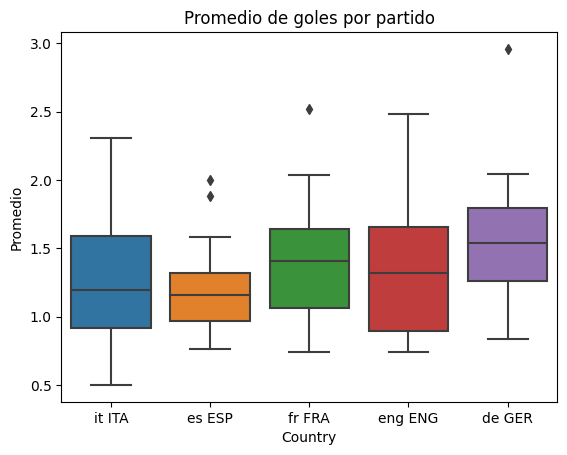

In [10]:
# Grafica boxplot
import seaborn as sns
from matplotlib import pyplot as plt
sns.boxplot(x='Country', y='Promedio', data=data_futbol)
plt.title('Promedio de goles por partido')

In [43]:
from pingouin import ttest
mean_goals = data_futbol.query('Country == "it ITA"')['Promedio'].mean()

# calcylo el ttst ebtre nis valores y 1 
test = ttest(data_futbol.query('Country == "it ITA"')['Promedio'], y = 2, alternative='two-sided')
if test['p-val'][0] < 0.05:
    print('Rechazamos H0, la media de goles es diferente a 2')
else:
    print('No rechazamos H0, la media de goles es igual a 2')

Rechazamos H0, la media de goles es diferente a 2


## ¿Se meten menos goles en Italia que en España?

No rechazamos H0


Text(0.5, 1.0, 'Promedio de goles por partido ITA vs ESP')

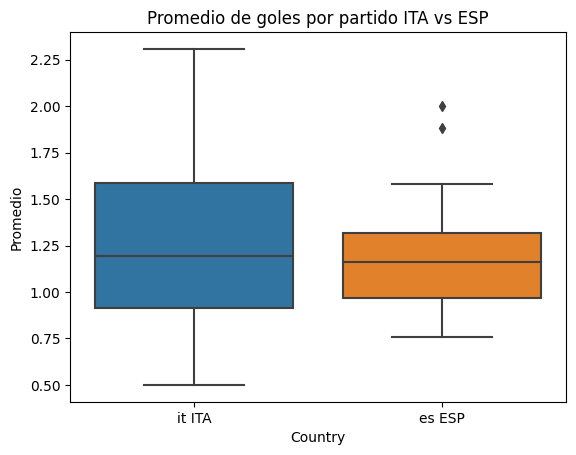

In [38]:
# Se meten menos goles en italia que en españa

test2 = ttest(data_futbol.query('Country == "es ESP"')['Promedio'], data_futbol.query('Country == "it ITA"')['Promedio'], alternative='greater')
if test2['p-val'][0] < 0.05:
    print('Rechazamos H0')
else:
    print('No rechazamos H0')

sns.boxplot(x='Country', y='Promedio', data=data_futbol.query('Country == "es ESP" or Country == "it ITA"'))
plt.title('Promedio de goles por partido ITA vs ESP')

## ¿Hay diferencia de goles entre ligas?, ¿en que liga se meten más goles?

En la liga Alemana se meten más goles con una media de:  1.59


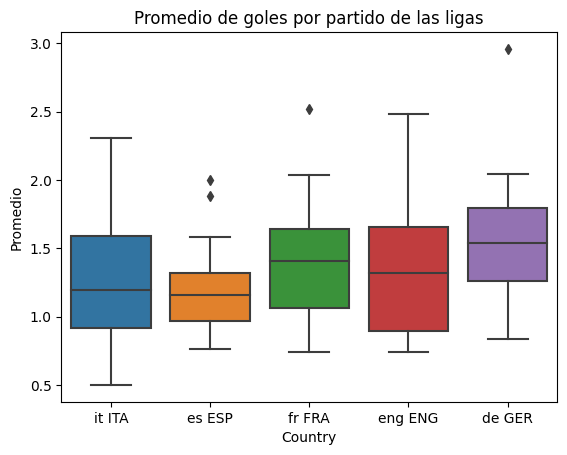

In [40]:
sns.boxplot(x='Country', y='Promedio', data=data_futbol)
plt.title('Promedio de goles por partido de las ligas')
print('En la liga Alemana se meten más goles con una media de: ', round(data_futbol.query('Country == "de GER"')['Promedio'].mean(),2))

In [44]:
# ¿Hay diferencia de goles entre ligas?, ¿en que liga se meten más goles?\
from pingouin import anova
anova = anova(data=data_futbol, dv='Promedio', between='Country')

if anova['p-unc'][0] < 0.05:
    print('Rechazamos H0, hay diferencia de goles entre ligas')
else :
    print('No rechazamos H0, no hay diferencia de goles entre ligas')

No rechazamos H0, no hay diferencia de goles entre ligas


## ¿Se están metiendo menos goles en general en las 5 grandes ligas respecto el año pasado?

In [54]:
data_futbol2 = pd.read_csv('data/futbol2.csv')
data_futbol2['Promedio'] = data_futbol2['GF']/data_futbol2['MP']
# ¿Se están metiendo menos goles en general en las 5 grandes ligas respecto el año pasado?

test = ttest(data_futbol2['Promedio'], data_futbol['Promedio'], alternative='greater')

if test['p-val'][0] < 0.05:
    print('Rechazamos H0, se están metiendo menos goles en general en las 5 grandes ligas respecto el año pasado')
else:
    print('No rechazamos H0, se están metiendo los mismos goles en general en las 5 grandes ligas respecto el año pasado')


    

No rechazamos H0, se están metiendo los mismos goles en general en las 5 grandes ligas respecto el año pasado


Text(0.5, 1.0, 'Promedio de goles por partido de las ligas')

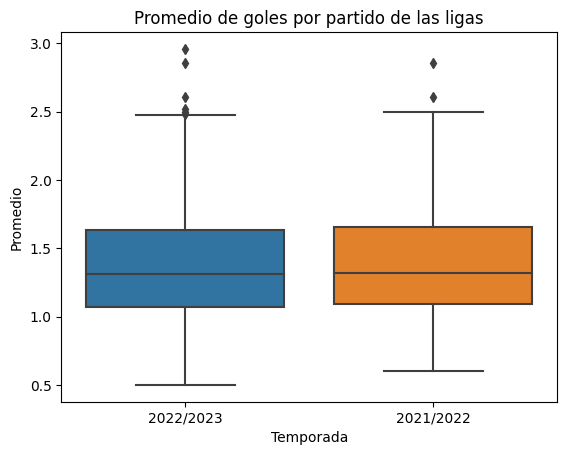

In [49]:
# Grafico promedio general de ls 5 ligas
data_futbol['Temporada'] = '2022/2023'
data_futbol2['Temporada'] = '2021/2022'

# Hacemos un merge de los dos dataframes
data_futbol = pd.concat([data_futbol, data_futbol2], axis=0)

sns.boxplot(x='Temporada', y='Promedio', data=data_futbol)
plt.title('Promedio de goles por partido de dos temporadas')